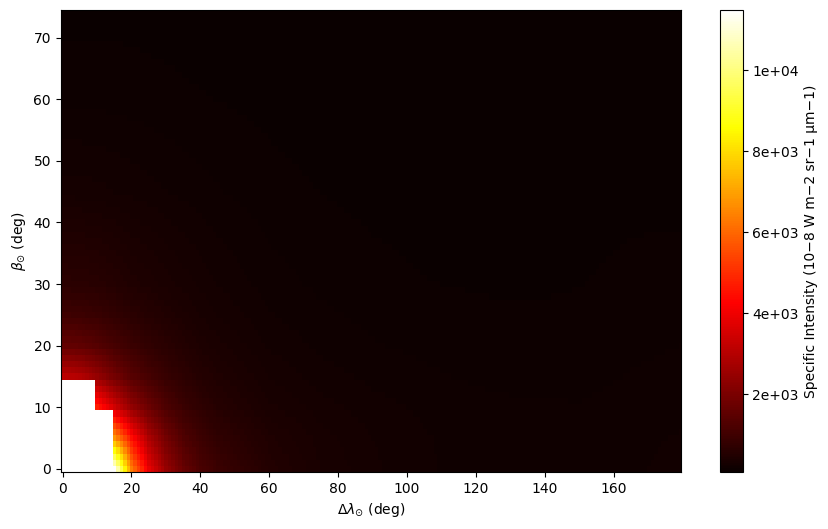

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RegularGridInterpolator
data = np.array([ 
                [np.nan,np.nan,np.nan,3140, 1610, 985, 640, 275, 150, 100 ],
                [np.nan,np.nan,np.nan,2940, 1540, 945, 625, 271, 150, 100 ],
                [np.nan,np.nan,4740, 2470, 1370, 865, 590, 264, 148, 100 ],
                [11500, 6780, 3440, 1860, 1110, 755, 525, 251, 146, 100 ],
                [6400, 4480, 2410, 1410, 910, 635, 454, 237, 141, 99 ],
                [3840, 2830, 1730, 1100, 749, 545, 410, 223, 136, 97 ],
                [2480, 1870, 1220, 845, 615, 467, 365, 207, 131, 95 ],
                [1650, 1270, 910, 680, 510, 397, 320, 193, 125, 93 ],
                [1180, 940, 700, 530, 416, 338, 282, 179, 120, 92 ],
                [910, 730, 555, 442, 356, 292, 250, 166, 116, 90 ],
                [505, 442, 352, 292, 243, 209, 183, 134, 104, 86 ],
                [338, 317, 269, 227, 196, 172, 151, 116, 93, 82 ],
                [259, 251, 225, 193, 166, 147, 132, 104, 86, 79 ],
                [212, 210, 197, 170, 150, 133, 119, 96, 82, 77 ],
                [188, 186, 177, 154, 138, 125, 113, 90, 77, 74 ],
                [179, 178, 166, 147, 134, 122, 110, 90, 77, 73 ],
                [179, 178, 165, 148, 137, 127, 116, 96, 79, 72 ],
                [196, 192, 179, 165, 151, 141, 131, 104, 82, 72 ],
                [230, 212, 195, 178, 163, 148, 134, 105, 83, 72 ] ])

x = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180])
y = np.array([0, 5, 10, 15, 20, 25, 30, 45, 60, 75])

# Use RegularGridInterpolator for interpolation
f = RegularGridInterpolator((x, y), data)

# Create a grid for new x and y values
xnew = np.arange(0, 180, 1)
ynew = np.arange(0, 75, 1)
xnew_grid, ynew_grid = np.meshgrid(xnew, ynew)

# Interpolate on the new grid
znew = f((xnew_grid, ynew_grid))

# Set up the plot size
plt.figure(figsize=(10, 6))
plt.imshow(znew, cmap='hot')

# Create a logarithmic colorbar
plt.colorbar(label='Specific Intensity (10−8 W m−2 sr−1 µm−1)', format='%.0e')  # Format for scientific notation

plt.xlabel(r'$\Delta \lambda _{\odot}$ (deg)')
plt.ylabel(r'$\beta _{\odot}$ (deg)')
#invert y axis
plt.gca().invert_yaxis()
plt.gca().set_aspect('auto')
plt.show()

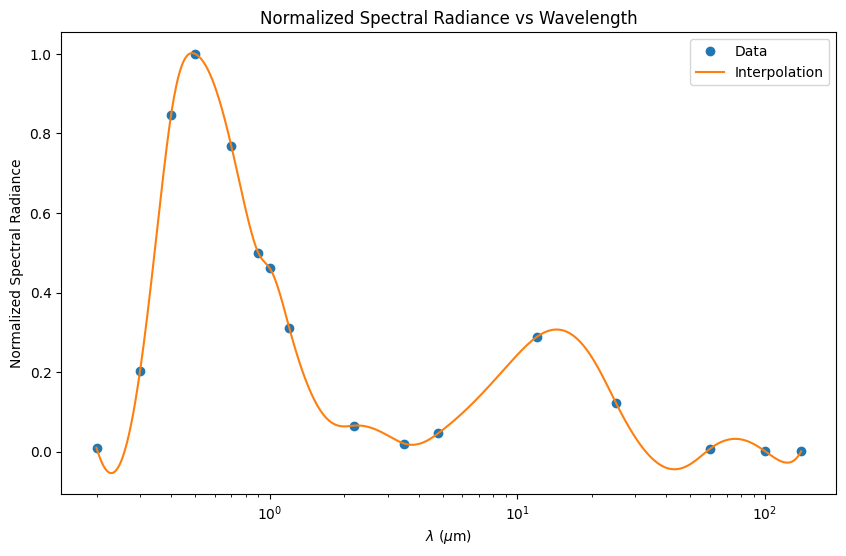

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Data
wavelength = np.array([0.2, 0.3, 0.4, 0.5, 0.7, 0.9, 1.0, 1.2, 2.2, 3.5, 4.8, 12, 25, 60, 100, 140]) # microns
spectral_radiance = np.array([2.5e-8, 5.3e-7, 2.2e-6, 2.6e-6, 2.0e-6, 1.3e-6, 1.2e-6, 8.1e-7, 1.7e-7, 5.2e-8, 1.2e-7, 7.5e-7, 3.2e-7, 1.8e-8, 3.2e-9, 6.9e-10])# W m-2 sr-1 micron-1

#Normalize the data with the value at 0.5 microns
spectral_radiance_nol = spectral_radiance/spectral_radiance[3]

# Interpolation
f_spectral = CubicSpline(wavelength, spectral_radiance_nol)
new_wavelength = np.exp(np.linspace(np.log(wavelength[0]), np.log(wavelength[-1]), 1000))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(wavelength, spectral_radiance_nol, 'o', label='Data')
plt.plot(new_wavelength, f_spectral(new_wavelength), label='Interpolation')
plt.xlabel(r'$\lambda$ ($\mu$m)')
plt.ylabel('Normalized Spectral Radiance')
plt.title('Normalized Spectral Radiance vs Wavelength')
plt.legend()
plt.xscale('log')
plt.show()


Fitted parameters:
a0 = 1.01
a1 = -0.00
a2 = -3.85
a3 = 5.87


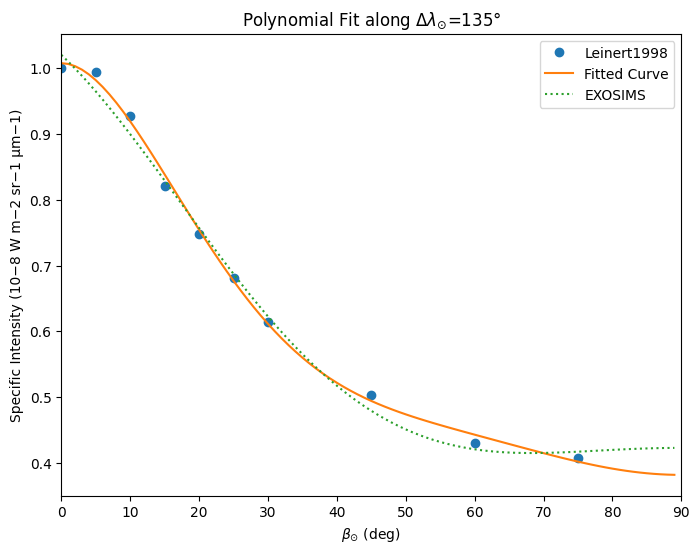

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Extract data along specific x value
target_x = 135
x_index = np.where(x == target_x)[0][0]
intensity_along_x135 = data[x_index, :]
normalize_intensity = intensity_along_x135/intensity_along_x135[0]
y_along_x135 = y
yint = np.arange(0, 90, 1)

# Define the fitting function
def fit_function(y, a0, a1, a2, a3, a4):
    return a0 + a1*np.sin(y*np.pi/180) + a2*np.sin(y*np.pi/180)**2 + a3*np.sin(y*np.pi/180)**3 + a4*np.sin(y*np.pi/180)**4

# Fit the function to the data
popt, pcov = curve_fit(fit_function, y_along_x135, normalize_intensity)

# Print the fitted parameters
print("Fitted parameters:")
print(f"a0 = {popt[0]:.2f}")
print(f"a1 = {popt[1]:.2f}")
print(f"a2 = {popt[2]:.2f}")
print(f"a3 = {popt[3]:.2f}")

# Plot the original data and the fitted curve
plt.figure(figsize=(8, 6))
plt.plot(y_along_x135, normalize_intensity, 'o', label='Leinert1998')
plt.plot(yint, fit_function(yint, *popt), '-', label='Fitted Curve')
plt.plot(yint, fit_function(yint, *[1.02,-.566,-.884,.853,0]), ':', label='EXOSIMS')
plt.xlabel(r'$\beta _{\odot}$ (deg)')
plt.ylabel('Specific Intensity (10−8 W m−2 sr−1 µm−1)')
plt.legend()
plt.title(r'Polynomial Fit along $\Delta \lambda_{\odot}$='+str(target_x)+r'$\degree$')
plt.xlim(0, 90)
plt.show()

Fitted parameters:
a0 = 1.03
a1 = -1.10
a2 = -0.08
a3 = 0.47


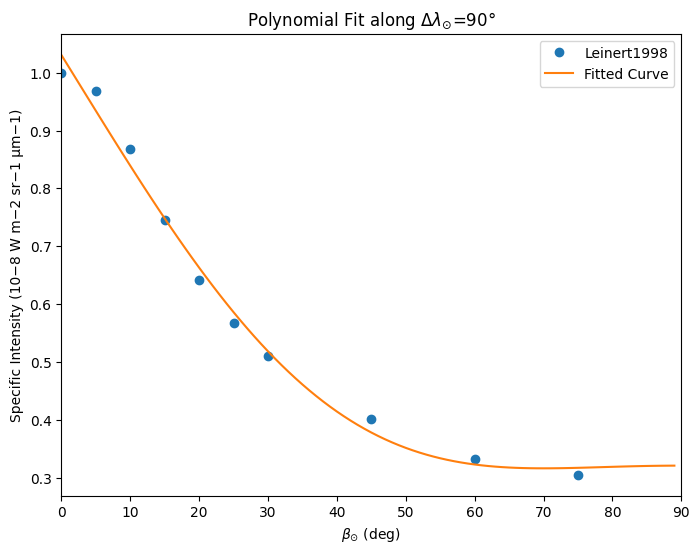

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Extract data along specific x value
target_x = 90
x_index = np.where(x == target_x)[0][0]
intensity_along_x135 = data[x_index, :]
normalize_intensity = intensity_along_x135/intensity_along_x135[0]
y_along_x135 = y
yint = np.arange(0, 90, 1)

# Define the fitting function
def fit_function(y, a0, a1, a2, a3):
    return a0 + a1*np.sin(y*np.pi/180) + a2*np.sin(y*np.pi/180)**2 + a3*np.sin(y*np.pi/180)**3

# Fit the function to the data
popt, pcov = curve_fit(fit_function, y_along_x135, normalize_intensity)

# Print the fitted parameters
print("Fitted parameters:")
print(f"a0 = {popt[0]:.2f}")
print(f"a1 = {popt[1]:.2f}")
print(f"a2 = {popt[2]:.2f}")
print(f"a3 = {popt[3]:.2f}")

# Plot the original data and the fitted curve
plt.figure(figsize=(8, 6))
plt.plot(y_along_x135, normalize_intensity, 'o', label='Leinert1998')
plt.plot(yint, fit_function(yint, *popt), '-', label='Fitted Curve')
plt.xlabel(r'$\beta _{\odot}$ (deg)')
plt.ylabel('Specific Intensity (10−8 W m−2 sr−1 µm−1)')
plt.legend()
plt.title(r'Polynomial Fit along $\Delta \lambda_{\odot}$='+str(target_x)+r'$\degree$')
plt.xlim(0, 90)
plt.show()

In [5]:
from math import pi
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.interpolate import RegularGridInterpolator
# extending the y axis to 90 degrees, by adding a fixed value of 90 degrees to the data
# 69 comes from the interpolation of x=135
data_500 = np.array([ 
                [np.nan,np.nan,np.nan,3140, 1610, 985, 640, 275, 150, 100, 69],
                [np.nan,np.nan,np.nan,2940, 1540, 945, 625, 271, 150, 100, 69 ],
                [np.nan,np.nan,4740, 2470, 1370, 865, 590, 264, 148, 100, 69 ],
                [11500, 6780, 3440, 1860, 1110, 755, 525, 251, 146, 100, 69 ],
                [6400, 4480, 2410, 1410, 910, 635, 454, 237, 141, 99, 69 ],
                [3840, 2830, 1730, 1100, 749, 545, 410, 223, 136, 97, 69 ],
                [2480, 1870, 1220, 845, 615, 467, 365, 207, 131, 95, 69 ],
                [1650, 1270, 910, 680, 510, 397, 320, 193, 125, 93, 69 ],
                [1180, 940, 700, 530, 416, 338, 282, 179, 120, 92, 69 ],
                [910, 730, 555, 442, 356, 292, 250, 166, 116, 90, 69 ],
                [505, 442, 352, 292, 243, 209, 183, 134, 104, 86, 69 ],
                [338, 317, 269, 227, 196, 172, 151, 116, 93, 82, 69 ],
                [259, 251, 225, 193, 166, 147, 132, 104, 86, 79, 69 ],
                [212, 210, 197, 170, 150, 133, 119, 96, 82, 77, 69 ],
                [188, 186, 177, 154, 138, 125, 113, 90, 77, 74, 69 ],
                [179, 178, 166, 147, 134, 122, 110, 90, 77, 73, 69 ],
                [179, 178, 165, 148, 137, 127, 116, 96, 79, 72, 69 ],
                [196, 192, 179, 165, 151, 141, 131, 104, 82, 72, 69 ],
                [230, 212, 195, 178, 163, 148, 134, 105, 83, 72, 69 ] ])
data_x = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180])
data_y = np.array([0, 5, 10, 15, 20, 25, 30, 45, 60, 75, 90])

# Use RegularGridInterpolator for interpolation of the data, find the specific intensity at 500 nm wavelength for the position angle and 90 - inclination angle
# Nomarlize the data with the value to the inclination angle 0 degree
f_pa_inc = RegularGridInterpolator((data_x, data_y), data_500/69, bounds_error=False, fill_value=None)

# Find the specific intensity depending on the wavelength and normalized to wavelength 500 nm
wavelength = np.array([0.2, 0.3, 0.4, 0.5, 0.7, 0.9, 1.0, 1.2, 2.2, 3.5, 4.8, 12, 25, 60, 100, 140]) # microns
spectral_radiance = np.array([2.5e-8, 5.3e-7, 2.2e-6, 2.6e-6, 2.0e-6, 1.3e-6, 1.2e-6, 8.1e-7, 1.7e-7, 5.2e-8, 1.2e-7, 7.5e-7, 3.2e-7, 1.8e-8, 3.2e-9, 6.9e-10])# W m-2 sr-1 micron-1

#Normalize the data with the value at 0.5 microns
spectral_radiance_nol = spectral_radiance/spectral_radiance[3]

# Interpolation
f_spectral = CubicSpline(wavelength, spectral_radiance_nol)

def exosims_disk(inc=60, wavelength=500, pixel_number=455, pixel_scale=0.01, system_distance=10):
    """
    Calculate the specific intensity of the exosims disk model.
    Parameters:
        inc (float): The inclination angle of the disk in degrees.
        wavelength (float): The wavelength in nm.
        pixel_number (int): The number of pixels along one axis in the image; Must be an odd number.
        pixel_scale (float): The scale of each pixel in arcseconds.
        system_distance (float): The distance to the system in parsecs.
    Returns:
        numpy.ndarray (np.float64): The specific intensity of the exosims disk model, in units of Jy arcsec^-2.
    """
    # Make empty array for the exosims disk model
    exosims_disk_model = np.empty((pixel_number, pixel_number))
    #Create an array with values show the distance from the center of the image
    y_size = np.cos(inc * np.pi / 180)
    x = np.arange(-pixel_number//2+1, pixel_number//2+1, 1)
    y = np.arange(-pixel_number//2+1, pixel_number//2+1, 1)
    x_grid, y_grid = np.meshgrid(x, y)

    # Calculate the distance from the center of the image in AU
    distances = np.sqrt(x_grid**2 + (y_grid*y_size)**2) * pixel_scale * system_distance
    # Set the distance at the center of the image, where the specific intensity is zero (no dust at the central star position)
    distances[pixel_number//2, pixel_number//2] = np.inf

    # Calculate the specific intensity of the exosims disk model
    for i in range(pixel_number):
        for j in range(pixel_number//2, pixel_number):
            exosims_disk_model[i, j] = f_pa_inc((np.arctan2(x_grid[i, j], y_grid[i, j]) * 180 / np.pi, 90-inc)) / distances[i, j]**2
    
    # Symmetrize the exosims disk model from right part to left part
    for i in range(pixel_number//2):
        exosims_disk_model[:, i] = exosims_disk_model[:, pixel_number-i-1]
    
    # 1 zodi = 22 mag/as^2 in V band
    # 22 mag/as^2 in V band is 5.99e-6 Jy/as^2 (Johnson UBVRI+) https://irsa.ipac.caltech.edu/data/SPITZER/docs/dataanalysistools/tools/pet/magtojy/
    return exosims_disk_model*f_spectral(wavelength/1000)*5.99e-6


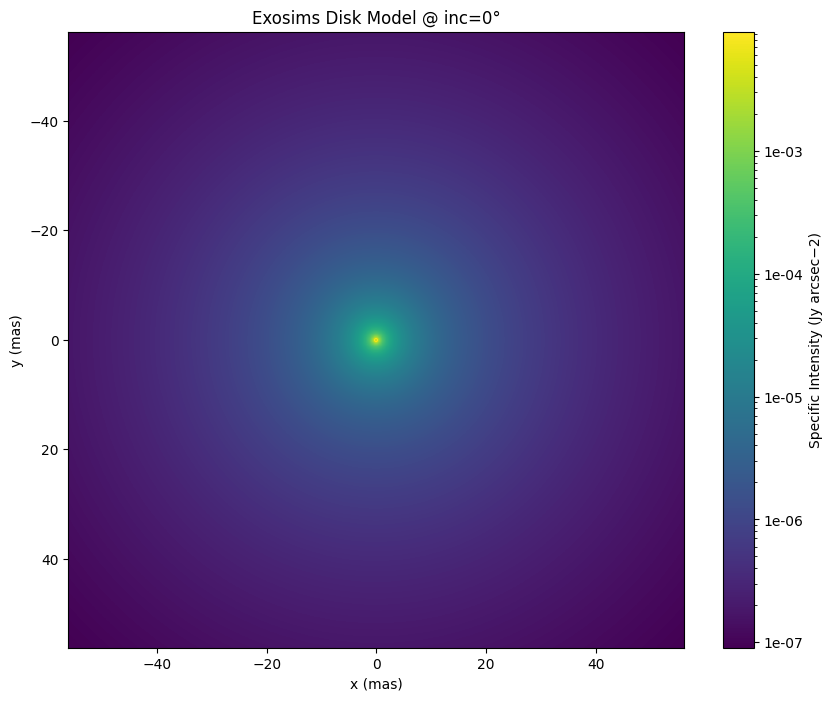

In [8]:
# Calculate the specific intensity of the exosims disk model
disk_inclination = 0
wavelength = 575 # nm
pixel_number = 455
pixel_scale = 0.002470880491500521 # arcseconds

exosims_disk_model = exosims_disk(disk_inclination, wavelength, pixel_number, pixel_scale)

# Plot the specific intensity of the exosims disk model
plt.figure(figsize=(10, 8))
extent = np.array([-1, 1, -1, 1])*pixel_number/2*pixel_scale*100
plt.imshow(exosims_disk_model, extent=extent, cmap='viridis',  norm = colors.LogNorm())

# colorbar in log scale
plt.colorbar(label='Specific Intensity (Jy arcsec−2)', format='%.0e') 
plt.xlabel('x (mas)')
plt.ylabel('y (mas)')
plt.title('Exosims Disk Model @ inc='+str(disk_inclination)+'°')
plt.gca().invert_yaxis()

# Set the aspect ratio of the plot to be equal
plt.gca().set_aspect('equal')
plt.show()
    

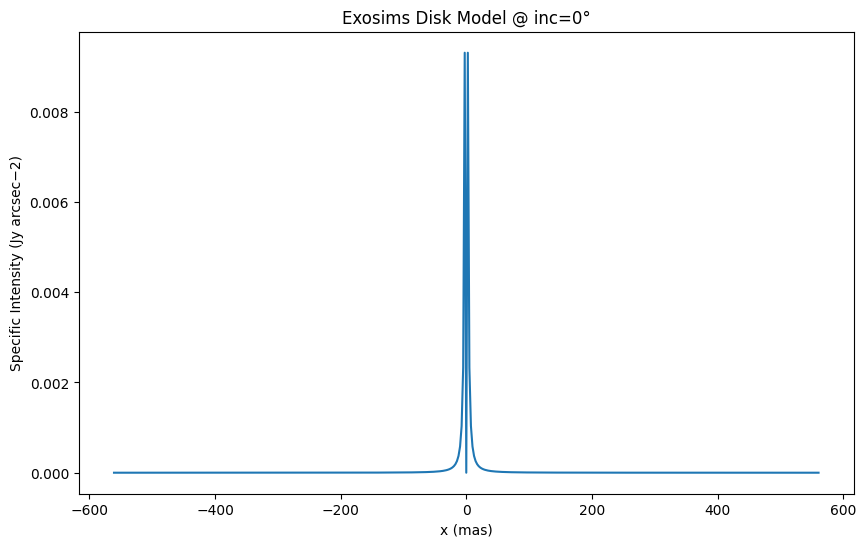

In [9]:
# plot the specific intensity of the exosims disk model at x-axis
plt.figure(figsize=(10, 6))
plt.plot(np.arange(-pixel_number//2+1, pixel_number//2+1, 1)*pixel_scale*1000, exosims_disk_model[pixel_number//2, :])
#save the data to npy file, including the x-axis and the specific intensity
np.save('exosims0.npy', np.array([np.arange(-pixel_number//2+1, pixel_number//2+1, 1)*pixel_scale*1000, exosims_disk_model[pixel_number//2, :]]))
plt.xlabel('x (mas)')
plt.ylabel('Specific Intensity (Jy arcsec−2)')
plt.title('Exosims Disk Model @ inc='+str(disk_inclination)+'°')
plt.show()